In [1]:
import os
os.chdir("..")
print("Current Directory:", os.getcwd())

Current Directory: d:\workspace\iscat


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import nd2

In [3]:
mode = 'Brightfield'
sample_path = os.path.join('dataset', '2024_11_11', 'Metasurface', 'Chip_02','Metasurface 01',mode)
nd2_path = os.path.join(sample_path,'02_01_BF.nd2')
Cy5_name = "Captured Cy5"
FITC_name = "Captured FITC"
TRITC_name = "Captured TRITC"
Cy5 = os.path.join(sample_path,f"{Cy5_name}.tif")
FITC = os.path.join(sample_path,f"{FITC_name}.tif")
TRITC = os.path.join(sample_path,f"{TRITC_name}.tif")

In [4]:
import numpy as np

def normalize_z_stack(z_stack_image):
    """
    Normalize a 16-bit z-stack image to the range [0, 1].

    Parameters:
        z_stack_image (np.ndarray): A 3D numpy array of shape (depth, height, width) with 16-bit values.

    Returns:
        np.ndarray: A normalized 3D array with values in the range [0, 1].
    """
    # Convert to float32 for precision before normalization
    z_stack_image = z_stack_image.astype(np.float32)

    # Get min and max for normalization
    min_val = z_stack_image.min()
    max_val = z_stack_image.max()

    # Avoid division by zero in case of a uniform image
    if max_val > min_val:
        normalized = (z_stack_image - min_val) / (max_val - min_val)
    else:
        normalized = np.zeros_like(z_stack_image, dtype=np.float32)

    return normalized

In [5]:
crop = (500,800,500,800)
with nd2.ND2File(nd2_path) as ndfile:
    z_stack_image = ndfile.asarray()
    z_stack_image = normalize_z_stack(z_stack_image)
    z_stack_image = z_stack_image[:,crop[0]:crop[1],crop[2]:crop[3]]

In [6]:
num_slices = z_stack_image.shape[0]
num_frames = 6
step = num_slices // num_frames
selected_indices = [i * step for i in range(num_frames)]
selected_frames = [z_stack_image[i] for i in selected_indices]
# Create meshgrid for the image dimensions
x = np.linspace(0, 1, selected_frames[0].shape[1])
y = np.linspace(0, 1, selected_frames[0].shape[0])
X, Y = np.meshgrid(x, y)

# # Create 3D figure
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# stretch_factor = 10  # Increase this value to stretch along the x-axis

# for i, frame in enumerate(selected_frames):
#     x_offset = i * stretch_factor  # Apply stretch factor here
#     ax.contourf(frame, Y, X, zdir='x', offset=x_offset, cmap='gray', levels=50)

# ax.set_xlim(-1, num_frames * stretch_factor) 
#  # Adjust x-axis limits accordingly
# ax.set_ylim(0, 1)
# ax.set_zlim(0, 1)
# ax.set_xlabel("Z-axis")
# ax.set_ylabel("X-axis")
# ax.set_zlabel("Y-axis")
# ax.axis('off')
# plt.title("3D Stacked Z-Stack Visualization (Stretched Along X-axis)")
# plt.show()

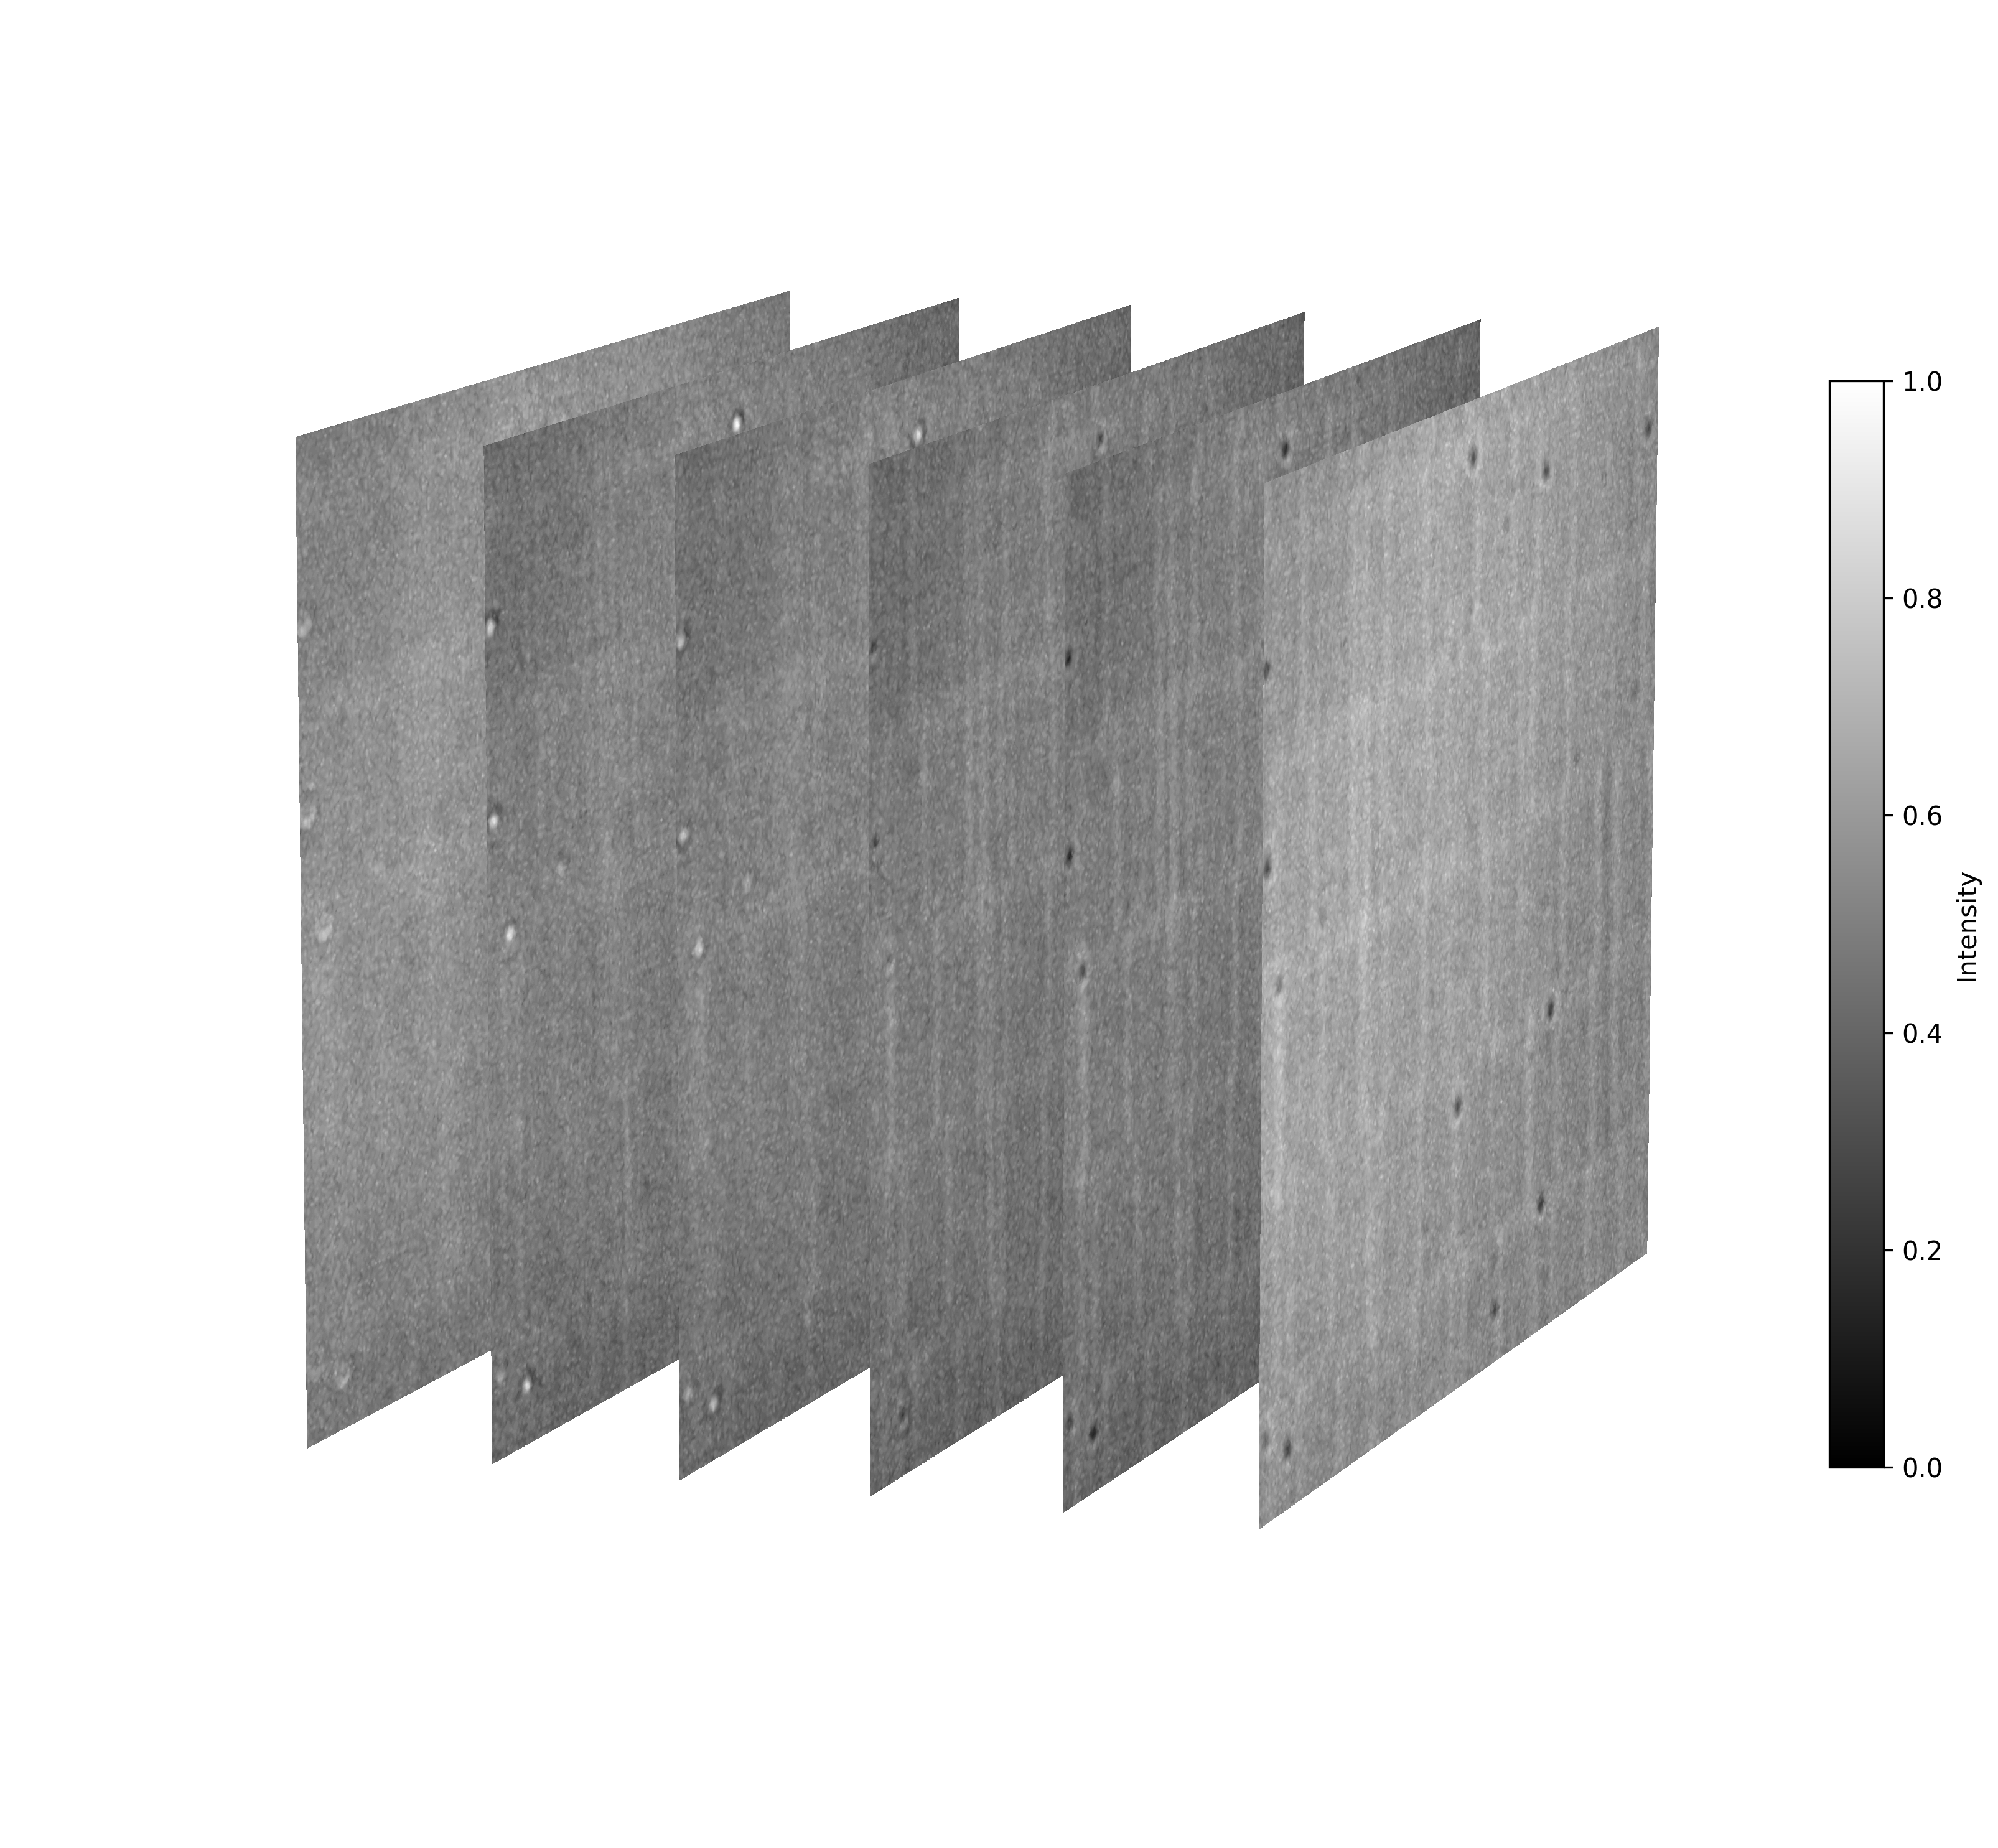

In [30]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

fig = plt.figure(figsize=(20, 10),dpi=300)
ax = fig.add_subplot(111, projection='3d')

selected_frames = np.concatenate([selected_frames], axis=0)

# Normalize the data to range [0, 1]
selected_frames_normalized = (selected_frames - selected_frames.min()) / (selected_frames.max() - selected_frames.min())

stretch_factor = 10.0  # Stretch along x-axis
norm = Normalize(vmin=0, vmax=1)  # Normalize to [0,1]
cmap = plt.cm.gray  # Choose a colormap

for i, frame in enumerate(selected_frames_normalized):
    x_offset = i * stretch_factor
    ax.contourf(
        frame, Y, X, zdir='x', offset=x_offset, cmap=cmap, levels=50, norm=norm
    )

# Add a colorbar with normalized range
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # Empty array to map the color scale correctly
cbar = plt.colorbar(sm, ax=ax, shrink=0.6, pad=0)
cbar.set_label("Intensity")

ax.set_xlim(-1, num_frames * stretch_factor)
ax.set_ylim(0, 0.9)
ax.set_zlim(0, 0.9)
ax.view_init(elev=10, azim=110)
ax.axis('off')
plt.tight_layout()
plt.savefig("benchmark/3d_z_stack.png",dpi=300,pad_inches = 0,bbox_inches = 'tight')
plt.show()

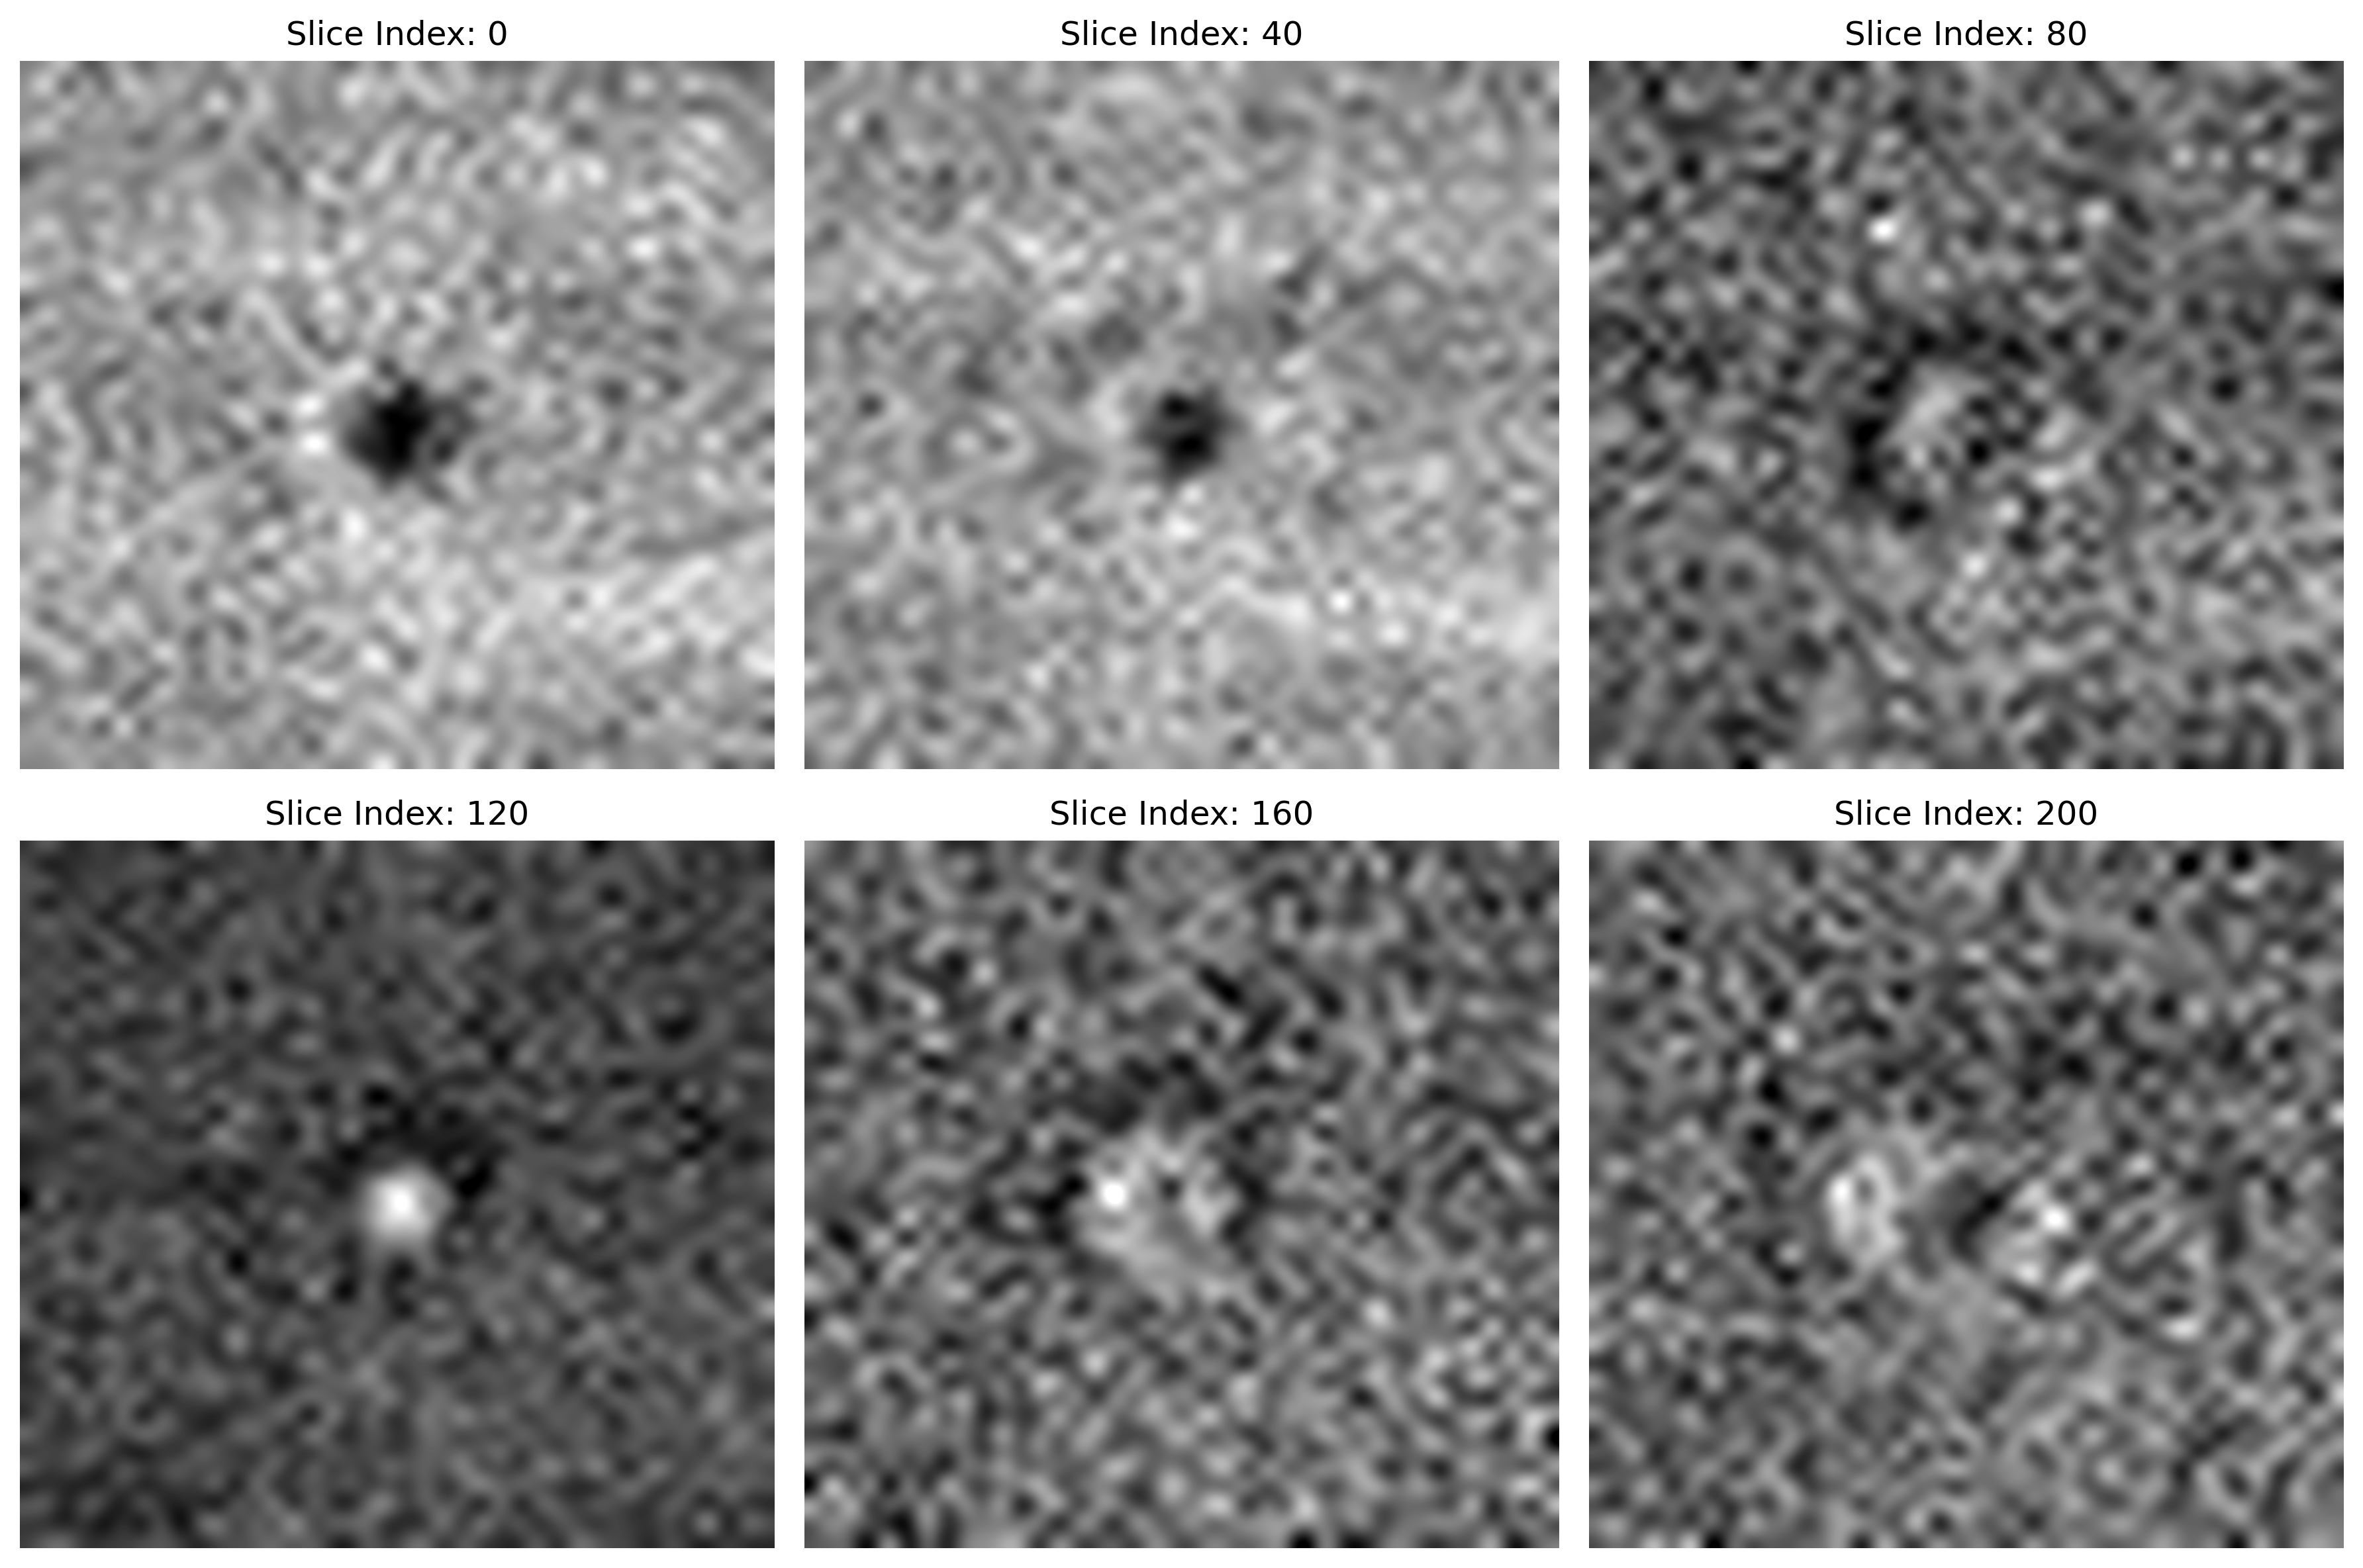

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assume z_stack_image is already loaded as a 3D array (e.g., shape [depth, height, width])
num_slices = 6  # Number of figures to plot
indices = np.linspace(0, 200, num_slices, dtype=int)  # Get evenly spaced indices

fig, axes = plt.subplots(2, 3, figsize=(12, 8),dpi=300)  # 2 rows, 3 columns of subplots
for idx, ax in zip(indices, axes.flatten()):
    cropped_slice = z_stack_image[idx][70:110, 20:60]  # Extract the desired region
    ax.imshow(cropped_slice, cmap='gray', aspect='auto',interpolation='lanczos')
    ax.set_title(f"Slice Index: {idx}")
    ax.axis('off')  # Hide axis for better visualization
plt.tight_layout()
plt.show()